In [205]:
# Core data analysis
import pandas as pd 
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [206]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [207]:
df=pd.read_csv("C:\\Users\Aryan\Downloads\Rocketium AI_ML Internship Assignment - 2 - Training dataset.csv")
print(df.head())

         date        company name  spend  impressions  likecount  \
0  2023-09-05  schneider-electric   5.85          479         31   
1  2023-09-01  schneider-electric   1.80         3880        224   
2  2023-09-04  schneider-electric   2.32          785         55   
3  2023-09-04  schneider-electric   3.94          658         54   
4  2023-09-04  schneider-electric   3.89         2568        168   

   commentcount  repostcount  total engagements  conversion action  ...  \
0             0            2                 33           7   Post  ...   
1             1            9                234           0   Post  ...   
2             1           16                 72          11   Post  ...   
3             1            5                 60           8   Post  ...   
4             1            5                174          25   Post  ...   

          voice sentiment text area % empty space %           topic language  \
0  Professional  Positive        0.00         > 40%       Of

In [208]:
print(df.tail())

            date         company name   spend  impressions  likecount  \
1049  2023-08-04  rockwell-automation    0.89          536         34   
1050  2023-08-08  rockwell-automation    1.88          154         12   
1051  2023-08-04  rockwell-automation  713.23        61614        622   
1052  2023-08-08  rockwell-automation   15.41         1000         32   
1053  2023-08-18  rockwell-automation   32.46         1743         64   

      commentcount  repostcount  total engagements  conversion action  ...  \
1049             1            1                 36           1   Post  ...   
1050             0            0                 12           3   Post  ...   
1051             2           80                704         105   Post  ...   
1052             0            1                 33           2   Post  ...   
1053             0            6                 70          18   Post  ...   

     voice sentiment text area % empty space %           topic language  \
1049   NaN       

In [209]:
print(df.sample(10))

           date         company name   spend  impressions  likecount  \
720  2023-08-18   schneider-electric   98.26         8010         61   
742  2023-08-25   schneider-electric    6.74         2479        129   
671  2023-08-03     johnson-controls  180.42         7684        690   
16   2023-09-06  rockwell-automation  150.51         7299         62   
395  2023-08-14     johnson-controls  178.23        16598        642   
980  2023-08-11               vertiv    3.08          460         29   
818  2023-08-21               vertiv   18.52          900         27   
947  2023-08-02            honeywell   30.24        13661        439   
839  2023-08-17               vertiv   23.04         1205         87   
702  2023-08-28   schneider-electric  214.80        28860        396   

     commentcount  repostcount  total engagements  conversion action  ...  \
720             0           19                 80          19   Post  ...   
742             0            9                138    

In [210]:
print(df.shape)

(1054, 57)


In [211]:
print(df.size)

60078


In [212]:
print(df.ndim)

2


In [213]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

In [214]:
print(df.describe().T)

                                     count          mean           std  min  \
spend                               1054.0    213.192998   1253.414372  0.0   
impressions                         1054.0  15075.879507  67763.338279  0.0   
likecount                           1054.0    197.481973    343.418407  0.0   
commentcount                        1054.0      2.911765      8.764124  0.0   
repostcount                         1054.0     11.707780     19.993921  0.0   
total engagements                   1054.0    212.101518    360.599591  0.0   
conversion                          1054.0     34.914611     61.291577  0.0   
number of faces                     1054.0      0.777989      1.899180  0.0   
face area percentage %              1054.0      0.644928      1.900660  0.0   
number of objects                   1054.0      1.817837      2.688484  0.0   
primary object area percentage %    1054.0     12.695187     22.180729  0.0   
secondary object area percentage %  1054.0      4.37

In [215]:
print(df.isnull().sum())

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

In [216]:
print(df.dtypes)

date                                   object
company name                           object
spend                                 float64
impressions                             int64
likecount                               int64
commentcount                            int64
repostcount                             int64
total engagements                       int64
conversion                              int64
action                                 object
type                                   object
posturl                                object
postcontent                            object
profileurl                             object
videourl                               object
sharedposturl                          object
created_at                             object
size                                   object
url                                    object
number of faces                         int64
face emotion                           object
face position                     

In [217]:
print(df.columns)

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area percentage %', 'secondary object',
       'secondary object position', 'secondary object area percentage %',
       'text', 'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 name',
       'logo 2 position', 'logo 2 area percentage %', 'number of persons',
       'person area %', 'person area', 'style', 'tone', 'voice', 'sentiment',
       'text area %', 'empty space %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length'],

In [218]:
print(df.count())

date                                  1054
company name                          1054
spend                                 1054
impressions                           1054
likecount                             1054
commentcount                          1054
repostcount                           1054
total engagements                     1054
conversion                            1054
action                                1054
type                                  1054
posturl                               1054
postcontent                           1054
profileurl                            1054
videourl                               221
sharedposturl                          244
created_at                            1054
size                                  1054
url                                    971
number of faces                       1054
face emotion                           294
face position                          294
face area percentage %                1054
objects    

In [219]:
#rows containing duplicate data and it's shape
duplicate=df[df.duplicated()]
print(duplicate)
print(duplicate.head(20))
print(duplicate.shape)

Empty DataFrame
Columns: [date, company name, spend, impressions, likecount, commentcount, repostcount, total engagements, conversion, action, type, posturl, postcontent, profileurl, videourl, sharedposturl, created_at, size, url, number of faces, face emotion, face position, face area percentage %, objects, number of objects, primary object, primary object position, primary object area percentage %, secondary object, secondary object position, secondary object area percentage %, text, text length, dominant colour, cta, logos, logo 1 name, logo 1 position, logo 1 area percentage %, logo 2 name, logo 2 position, logo 2 area percentage %, number of persons, person area %, person area, style, tone, voice, sentiment, text area %, empty space %, topic, language, # faces, # persons, # objects, # text length]
Index: []

[0 rows x 57 columns]
Empty DataFrame
Columns: [date, company name, spend, impressions, likecount, commentcount, repostcount, total engagements, conversion, action, type, post

In [220]:
print(df.describe(include="all"))

              date         company name         spend    impressions  \
count         1054                 1054   1054.000000    1054.000000   
unique          42                    8           NaN            NaN   
top     2023-09-06  rockwell-automation           NaN            NaN   
freq            48                  322           NaN            NaN   
mean           NaN                  NaN    213.192998   15075.879507   
std            NaN                  NaN   1253.414372   67763.338279   
min            NaN                  NaN      0.000000       0.000000   
25%            NaN                  NaN      6.615000     803.750000   
50%            NaN                  NaN     23.645000    2577.000000   
75%            NaN                  NaN     87.315000    7612.250000   
max            NaN                  NaN  23039.110000  961453.000000   

          likecount  commentcount  repostcount  total engagements  \
count   1054.000000   1054.000000  1054.000000        1054.000000 

In [221]:
# Calculate the engagement rate
df['engagement_rate'] = (df['total engagements'] / df['impressions']) * 100

# Display the sample DataFrame with the new 'engagement_rate' column
print(df.sample(10))

            date         company name   spend  impressions  likecount  \
333   2023-08-23  rockwell-automation    0.89          947         21   
555   2023-08-04               vertiv    0.97         3112        197   
309   2023-08-29               vertiv   11.12          883         22   
524   2023-08-09               vertiv    5.85          591         40   
762   2023-08-15               vertiv  356.99        17172        225   
658   2023-08-28     johnson-controls  147.63        15518        289   
295   2023-08-22   schneider-electric   85.03         4228        265   
1004  2023-08-01               vertiv    0.49          303         25   
472   2023-08-07               vertiv    7.10          311         28   
313   2023-08-09               vertiv   16.00          640         40   

      commentcount  repostcount  total engagements  conversion action  ...  \
333              0            3                 24           7   Post  ...   
555              1           10         

[[<AxesSubplot:title={'center':'spend'}>
  <AxesSubplot:title={'center':'impressions'}>
  <AxesSubplot:title={'center':'likecount'}>
  <AxesSubplot:title={'center':'commentcount'}>]
 [<AxesSubplot:title={'center':'repostcount'}>
  <AxesSubplot:title={'center':'total engagements'}>
  <AxesSubplot:title={'center':'conversion'}>
  <AxesSubplot:title={'center':'number of faces'}>]
 [<AxesSubplot:title={'center':'face area percentage %'}>
  <AxesSubplot:title={'center':'number of objects'}>
  <AxesSubplot:title={'center':'primary object area percentage %'}>
  <AxesSubplot:title={'center':'secondary object area percentage %'}>]
 [<AxesSubplot:title={'center':'text length'}>
  <AxesSubplot:title={'center':'logo 1 area percentage %'}>
  <AxesSubplot:title={'center':'logo 2 area percentage %'}>
  <AxesSubplot:title={'center':'number of persons'}>]
 [<AxesSubplot:title={'center':'person area'}>
  <AxesSubplot:title={'center':'text area %'}>
  <AxesSubplot:title={'center':'engagement_rate'}> <Axe

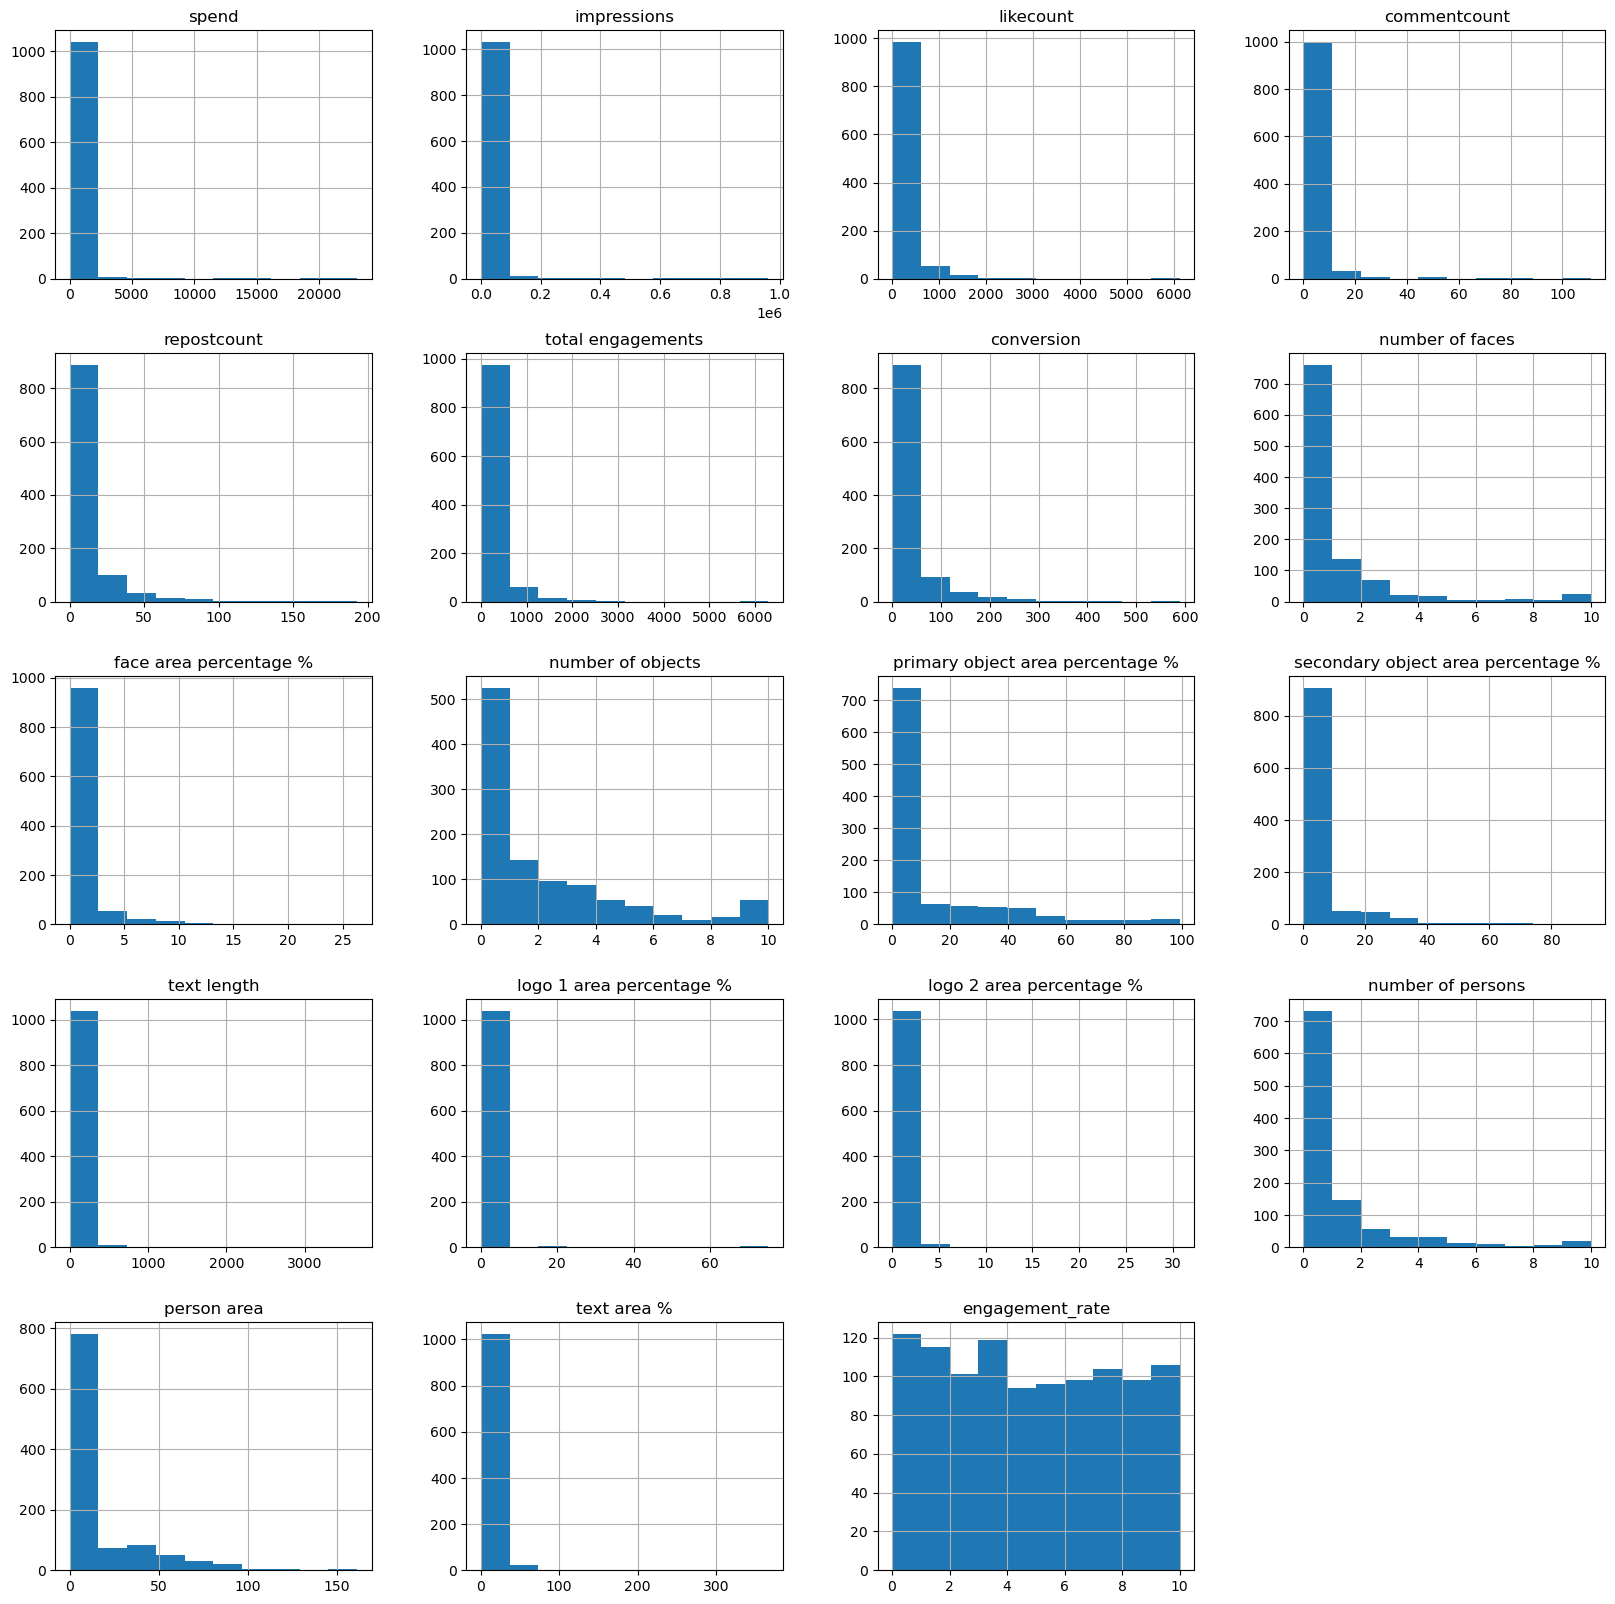

In [222]:
#for drawing a histogram for the data
print(df.hist(figsize=(20,20)))

Text(0.5, 1.0, 'Engagement Rate Distribution')

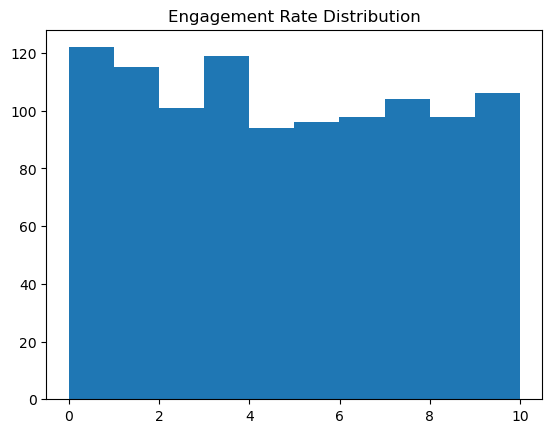

In [223]:
# Histogram of engagement rate 
plt.hist(df['engagement_rate'])
plt.title('Engagement Rate Distribution')

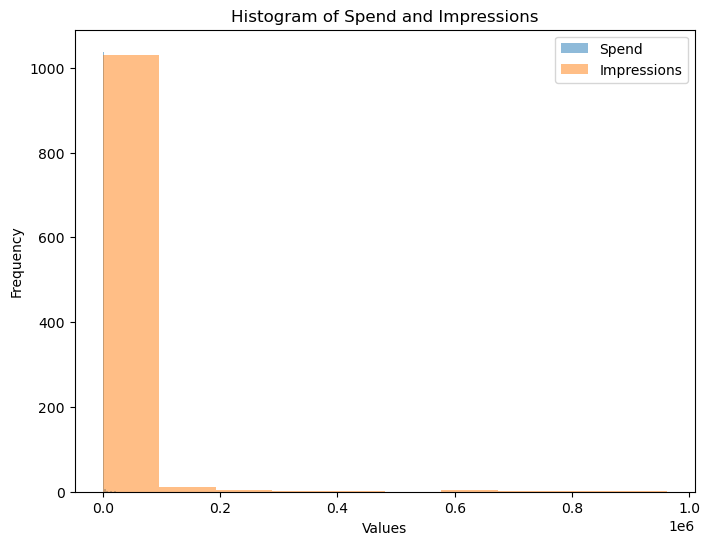

In [262]:
#histogram for spend vs impressions
plt.figure(figsize=(8, 6))
plt.hist(df["spend"], bins=10, alpha=0.5, label='Spend')
plt.hist(df["impressions"], bins=10, alpha=0.5, label='Impressions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Spend and Impressions')
plt.show()

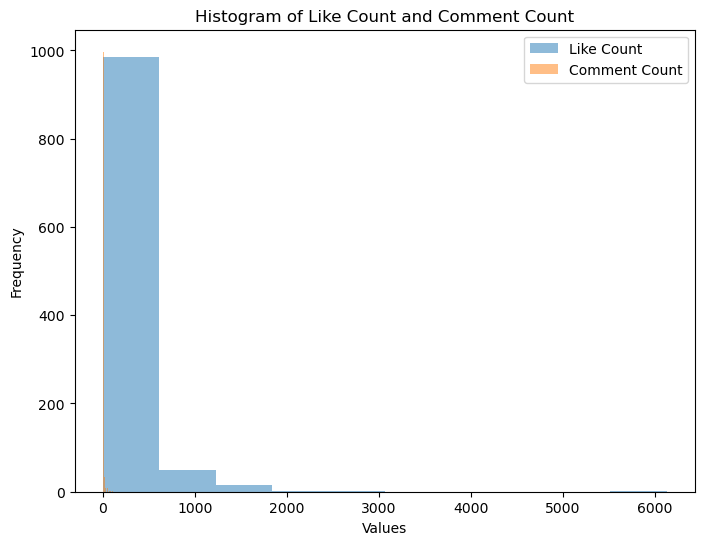

In [263]:
#histogram for likecount vs commentcount
plt.figure(figsize=(8, 6))
plt.hist(df["likecount"], bins=10, alpha=0.5, label='Like Count')
plt.hist(df["commentcount"], bins=10, alpha=0.5, label='Comment Count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Like Count and Comment Count')
plt.show()

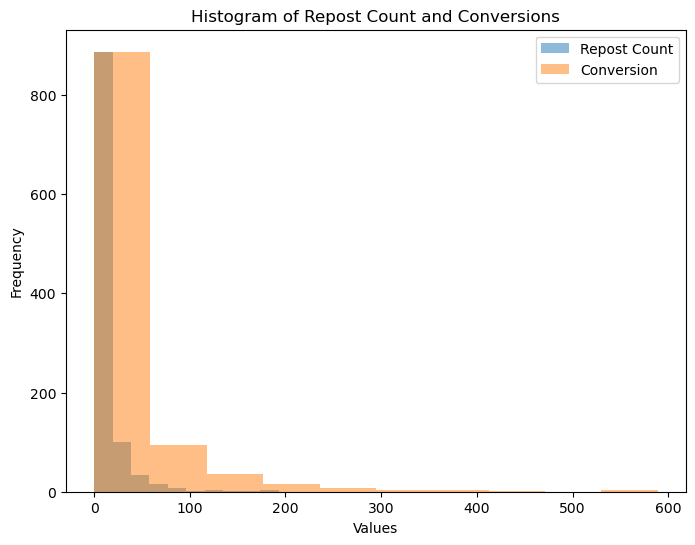

In [265]:
#histogram for repostcount vs conversion
plt.figure(figsize=(8, 6))
plt.hist(df["repostcount"], bins=10, alpha=0.5, label='Repost Count')
plt.hist(df["conversion"], bins=10, alpha=0.5, label='Conversion')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Repost Count and Conversions')
plt.show()

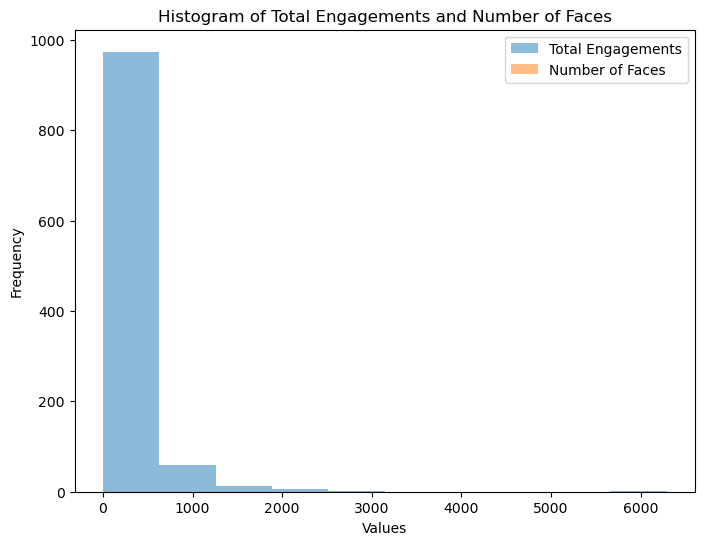

In [266]:
#histogram for total engagaements vs number of faces
plt.figure(figsize=(8, 6))
plt.hist(df["total engagements"], bins=10, alpha=0.5, label='Total Engagements')
plt.hist(df["number of faces"], bins=10, alpha=0.5, label='Number of Faces')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Total Engagements and Number of Faces')
plt.show()

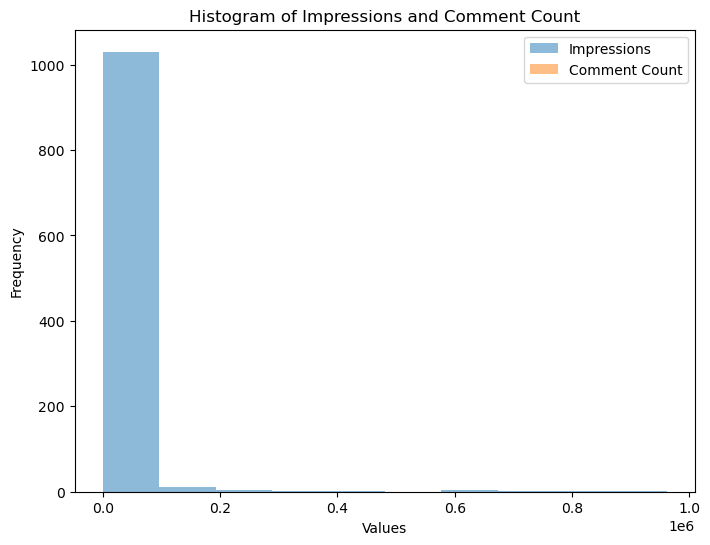

In [268]:
#histogram for impressions vs commentcount
plt.figure(figsize=(8, 6))
plt.hist(df["impressions"], bins=10, alpha=0.5, label='Impressions')
plt.hist(df["commentcount"], bins=10, alpha=0.5, label='Comment Count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Impressions and Comment Count')
plt.show()

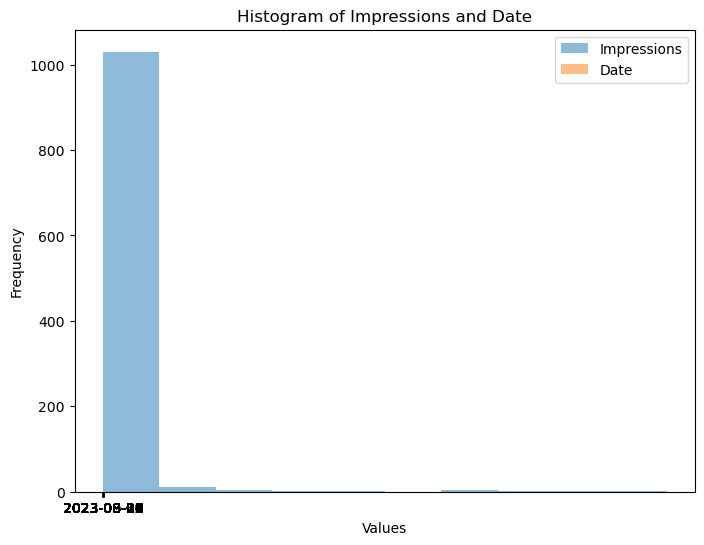

In [269]:
#histogram for impressions vs date
plt.figure(figsize=(8, 6))
plt.hist(df["impressions"], bins=10, alpha=0.5, label='Impressions')
plt.hist(df["date"], bins=10, alpha=0.5, label='Date')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Impressions and Date')
plt.show()

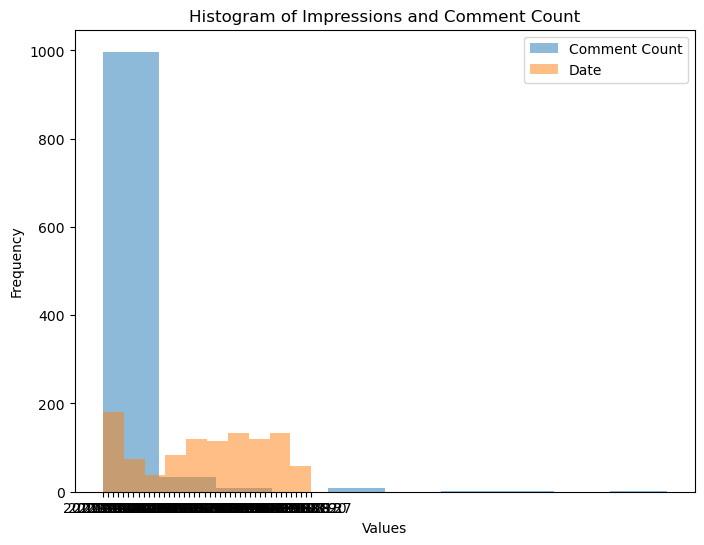

In [270]:
#histogram for commentcount vs date
plt.figure(figsize=(8, 6))
plt.hist(df["commentcount"], bins=10, alpha=0.5, label='Comment Count')
plt.hist(df["date"], bins=10, alpha=0.5, label='Date')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Impressions and Comment Count')
plt.show()

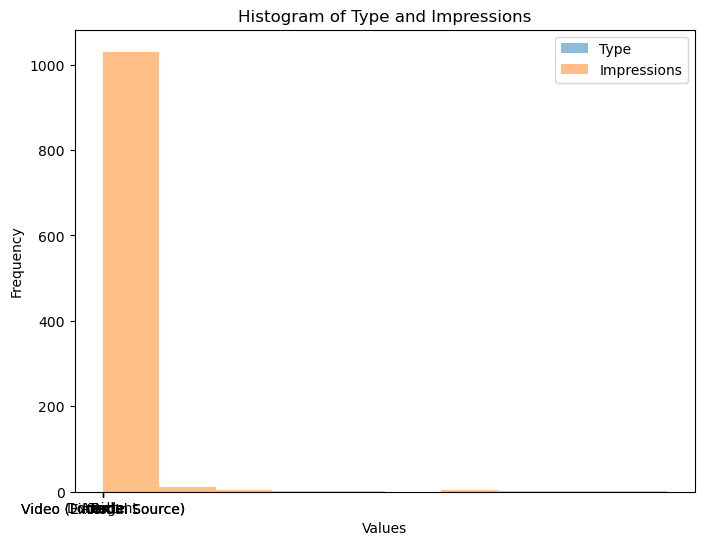

In [276]:
#histogram for type vs impressions
plt.figure(figsize=(8, 6))
plt.hist(df["type"], bins=10, alpha=0.5, label='Type')
plt.hist(df["impressions"], bins=10, alpha=0.5, label='Impressions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Type and Impressions')
plt.show()

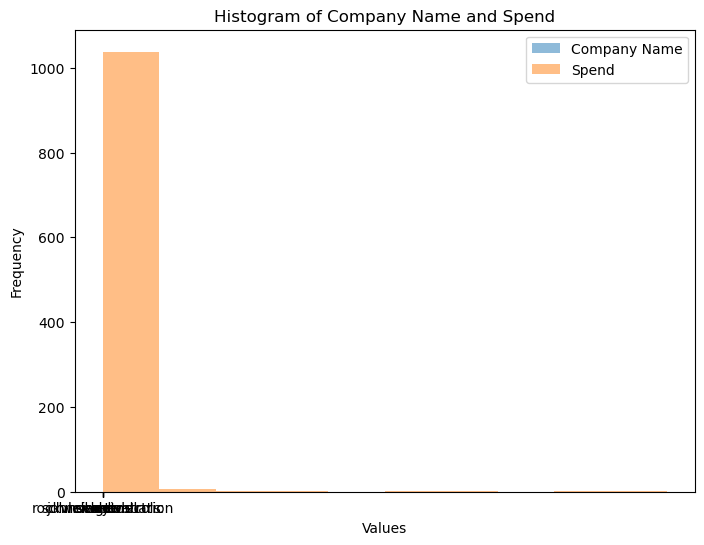

In [278]:
#histogram for company name vs spend
plt.figure(figsize=(8, 6))
plt.hist(df["company name"], bins=10, alpha=0.5, label='Company Name')
plt.hist(df["spend"], bins=10, alpha=0.5, label='Spend')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Company Name and Spend')
plt.show()

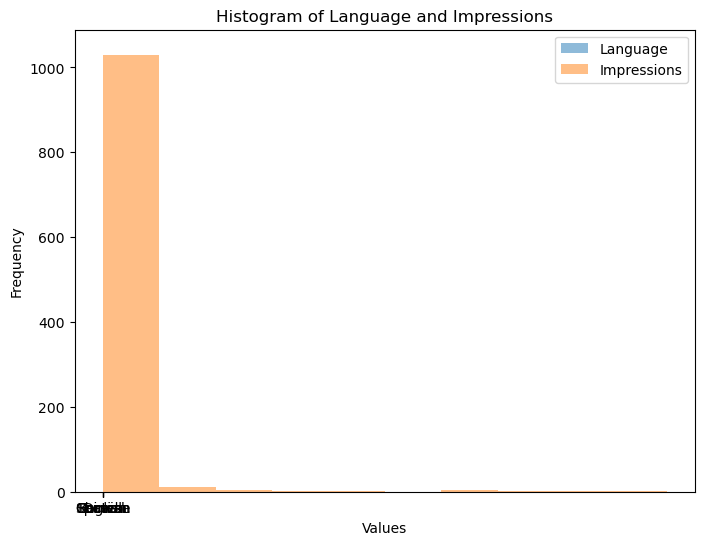

In [279]:
#histogram for language vs impressions
plt.figure(figsize=(8, 6))
plt.hist(df["language"], bins=10, alpha=0.5, label='Language')
plt.hist(df["impressions"], bins=10, alpha=0.5, label='Impressions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Language and Impressions')
plt.show()

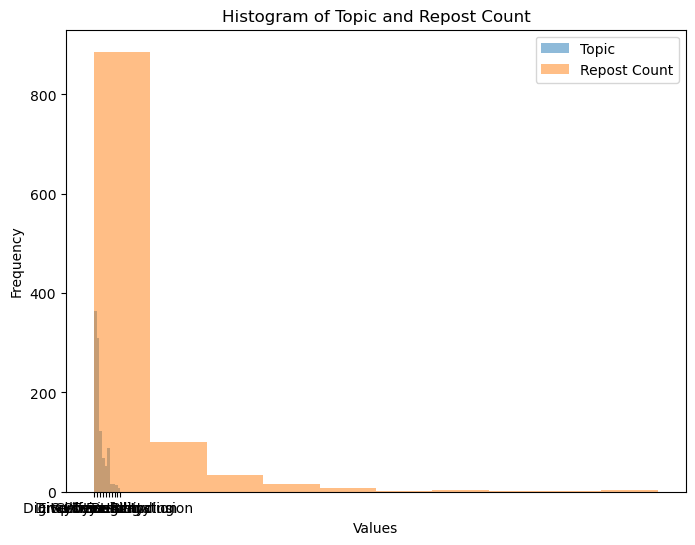

In [280]:
#histogram for topic vs repostcount
plt.figure(figsize=(8, 6))
plt.hist(df["topic"], bins=10, alpha=0.5, label='Topic')
plt.hist(df["repostcount"], bins=10, alpha=0.5, label='Repost Count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Topic and Repost Count')
plt.show()

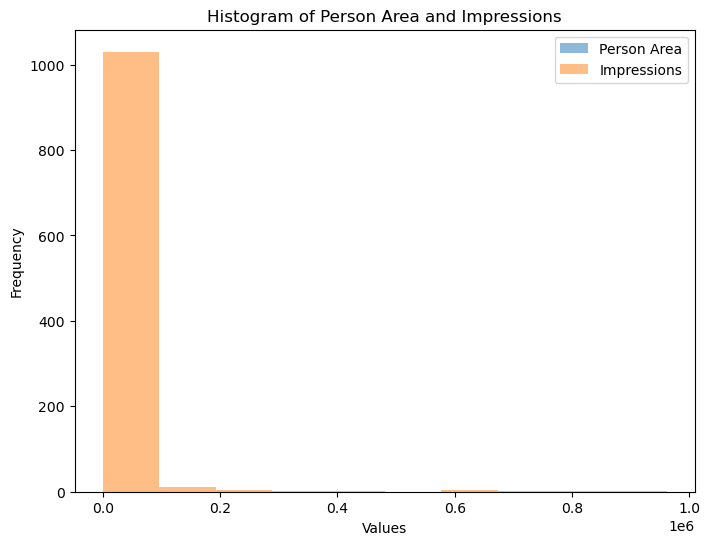

In [282]:
#histogram for person area vs impressions
plt.figure(figsize=(8, 6))
plt.hist(df["person area"], bins=10, alpha=0.5, label='Person Area')
plt.hist(df["impressions"], bins=10, alpha=0.5, label="Impressions")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Person Area and Impressions')
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


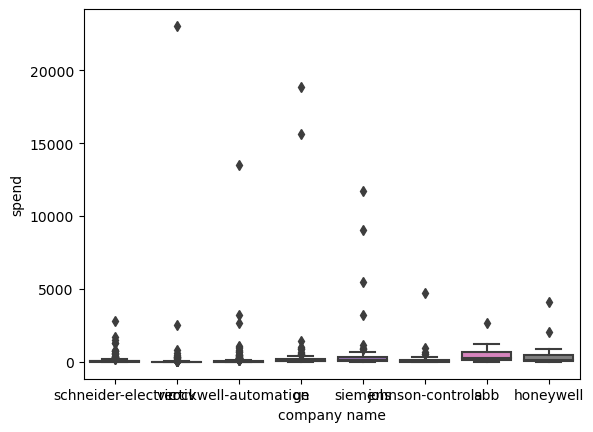

In [283]:
#for showing a relationship between categorical and continuous variable company name and spend
import seaborn as sns
print(sns.boxplot(x="company name",y="spend",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


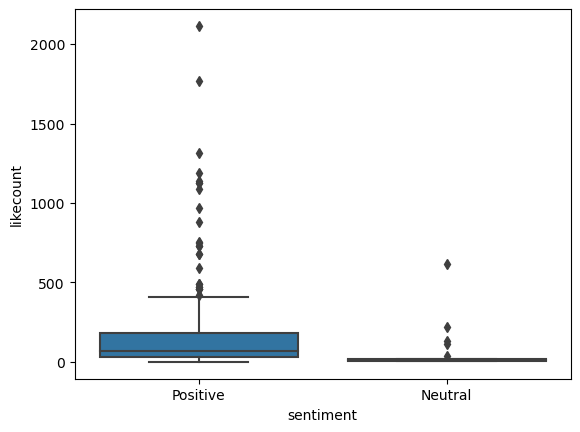

In [225]:
#for showing a relationship between categorical and continuous variable sentiment and likecount
import seaborn as sns
print(sns.boxplot(x="sentiment",y="likecount",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


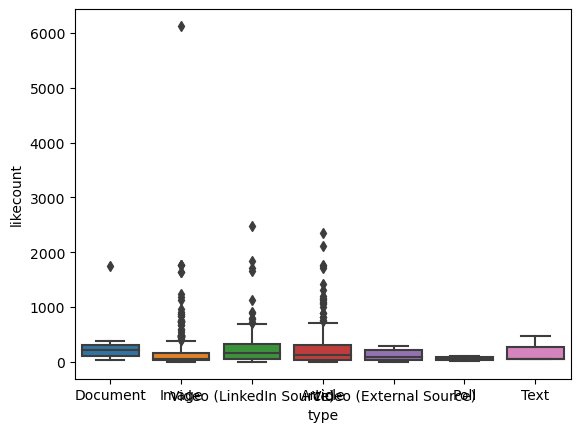

In [226]:
#for showing a relationship between categorical and continuous variable type and likecount
import seaborn as sns
print(sns.boxplot(x="type",y="likecount",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


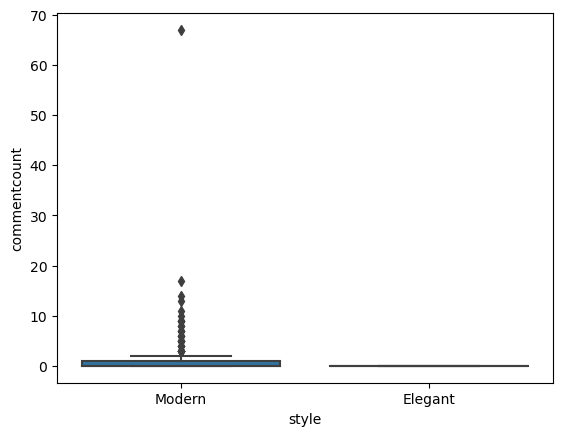

In [227]:
#for showing a relationship between categorical and continuous variable style and commentcount
import seaborn as sns
print(sns.boxplot(x="style",y="commentcount",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


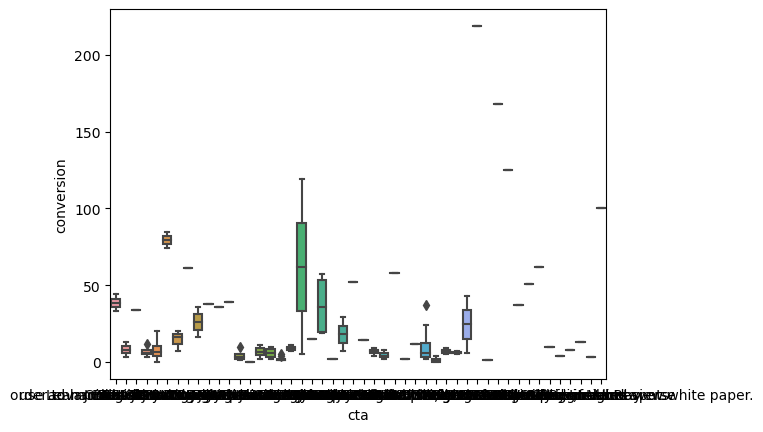

In [228]:
#for showing a relationship between categorical and continuous variable cta and conversion
import seaborn as sns
print(sns.boxplot(x="cta",y="conversion",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


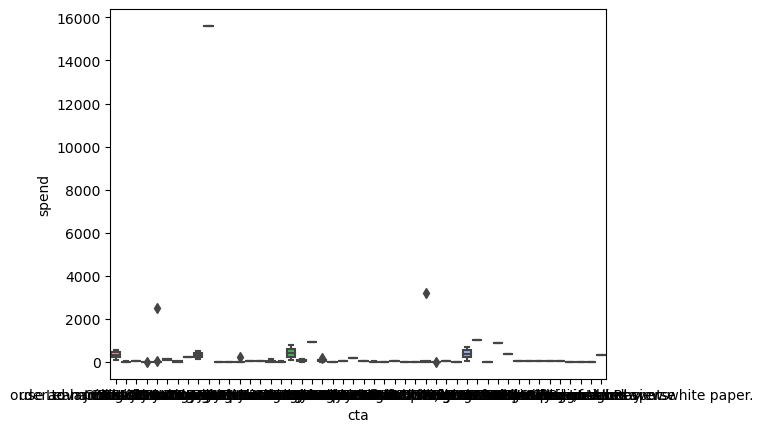

In [229]:
#for showing a relationship between categorical and continuous variable cta and spend
import seaborn as sns
print(sns.boxplot(x="cta",y="spend",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


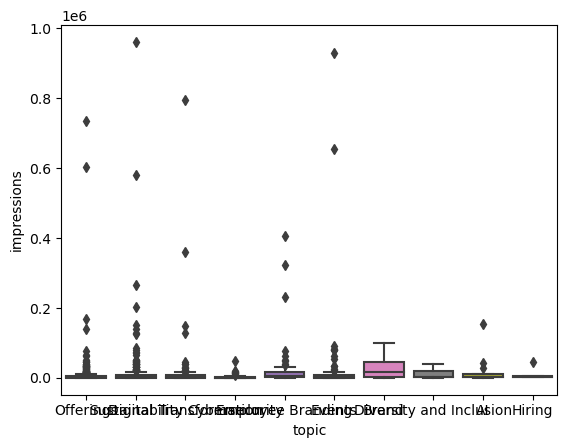

In [230]:
#for showing a relationship between categorical and continuous variable topic and impressions
import seaborn as sns
print(sns.boxplot(x="topic",y="impressions",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


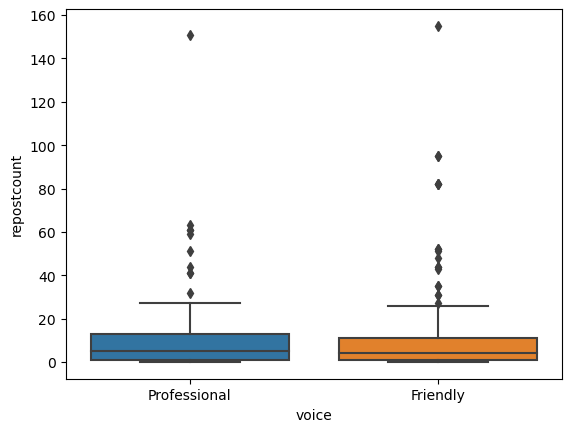

In [231]:
#for showing a relationship between categorical and continuous variable voice and repostcount
import seaborn as sns
print(sns.boxplot(x="voice",y="repostcount",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


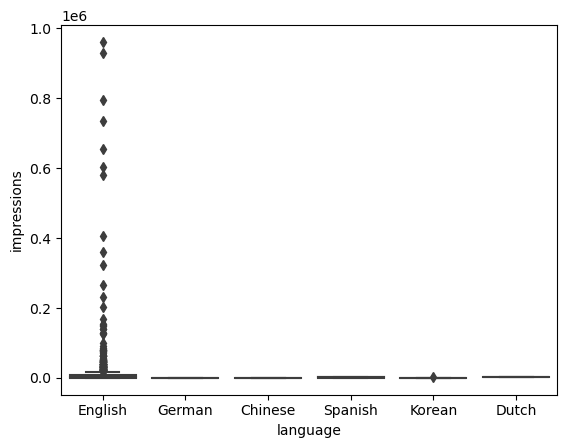

In [232]:
#for showing a relationship between categorical and continuous variable language and impressions
import seaborn as sns
print(sns.boxplot(x="language",y="impressions",data=df))

AxesSubplot(0.125,0.11;0.775x0.77)


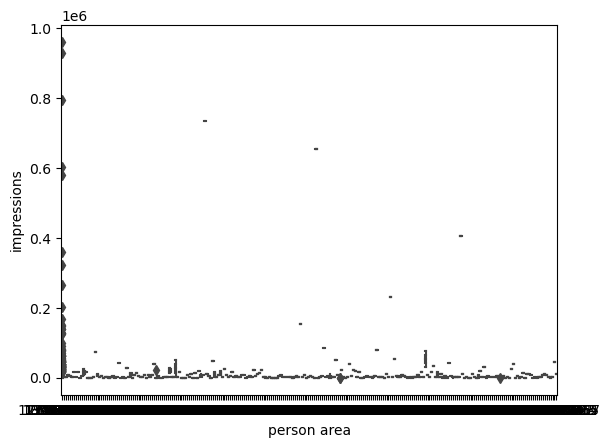

In [233]:
#for showing a relationship between categorical and continuous variable person area and impressions
import seaborn as sns
print(sns.boxplot(x="person area",y="impressions",data=df))

<AxesSubplot:xlabel='impressions', ylabel='total engagements'>

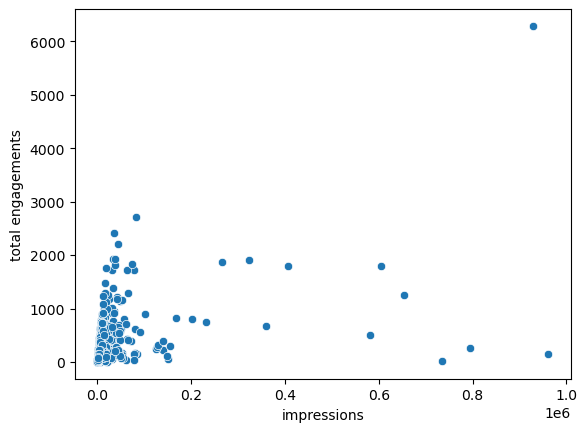

In [234]:
# Scatter plot between impressions and total engagements
sns.scatterplot(x='impressions', y='total engagements', data=df)

<AxesSubplot:>

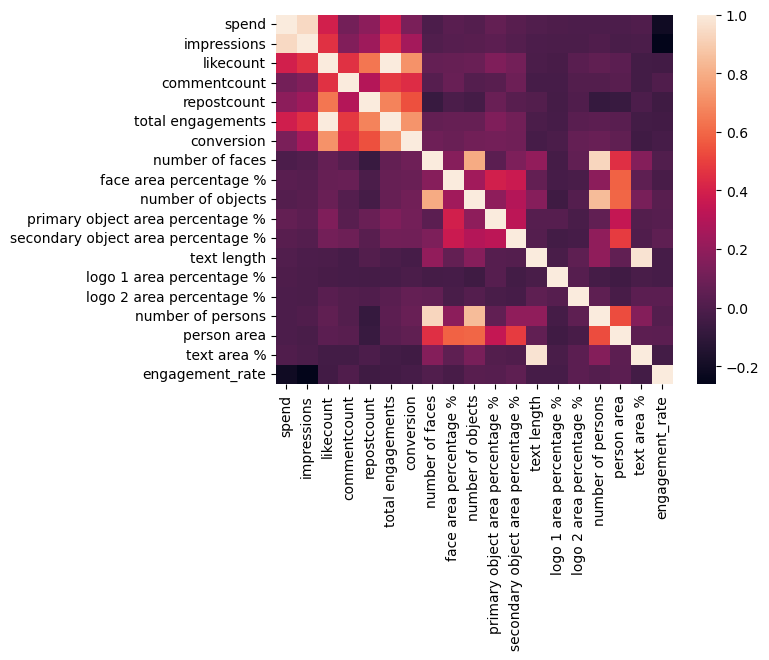

In [235]:
# Correlation matrix heatmap
corr_mat = df.corr()
sns.heatmap(corr_mat)

                                       spend  impressions  likecount  \
spend                               1.000000     0.940862   0.390050   
impressions                         0.940862     1.000000   0.455430   
likecount                           0.390050     0.455430   1.000000   
commentcount                        0.108923     0.151387   0.454619   
repostcount                         0.186267     0.236291   0.639175   
total engagements                   0.384441     0.450511   0.998843   
conversion                          0.128944     0.251812   0.716050   
number of faces                    -0.005485     0.009564   0.066168   
face area percentage %              0.031868     0.020799   0.071363   
number of objects                   0.015853     0.025712   0.078810   
primary object area percentage %    0.060342     0.043533   0.144818   
secondary object area percentage %  0.027178     0.018622   0.108388   
text length                         0.006009    -0.007833  -0.01

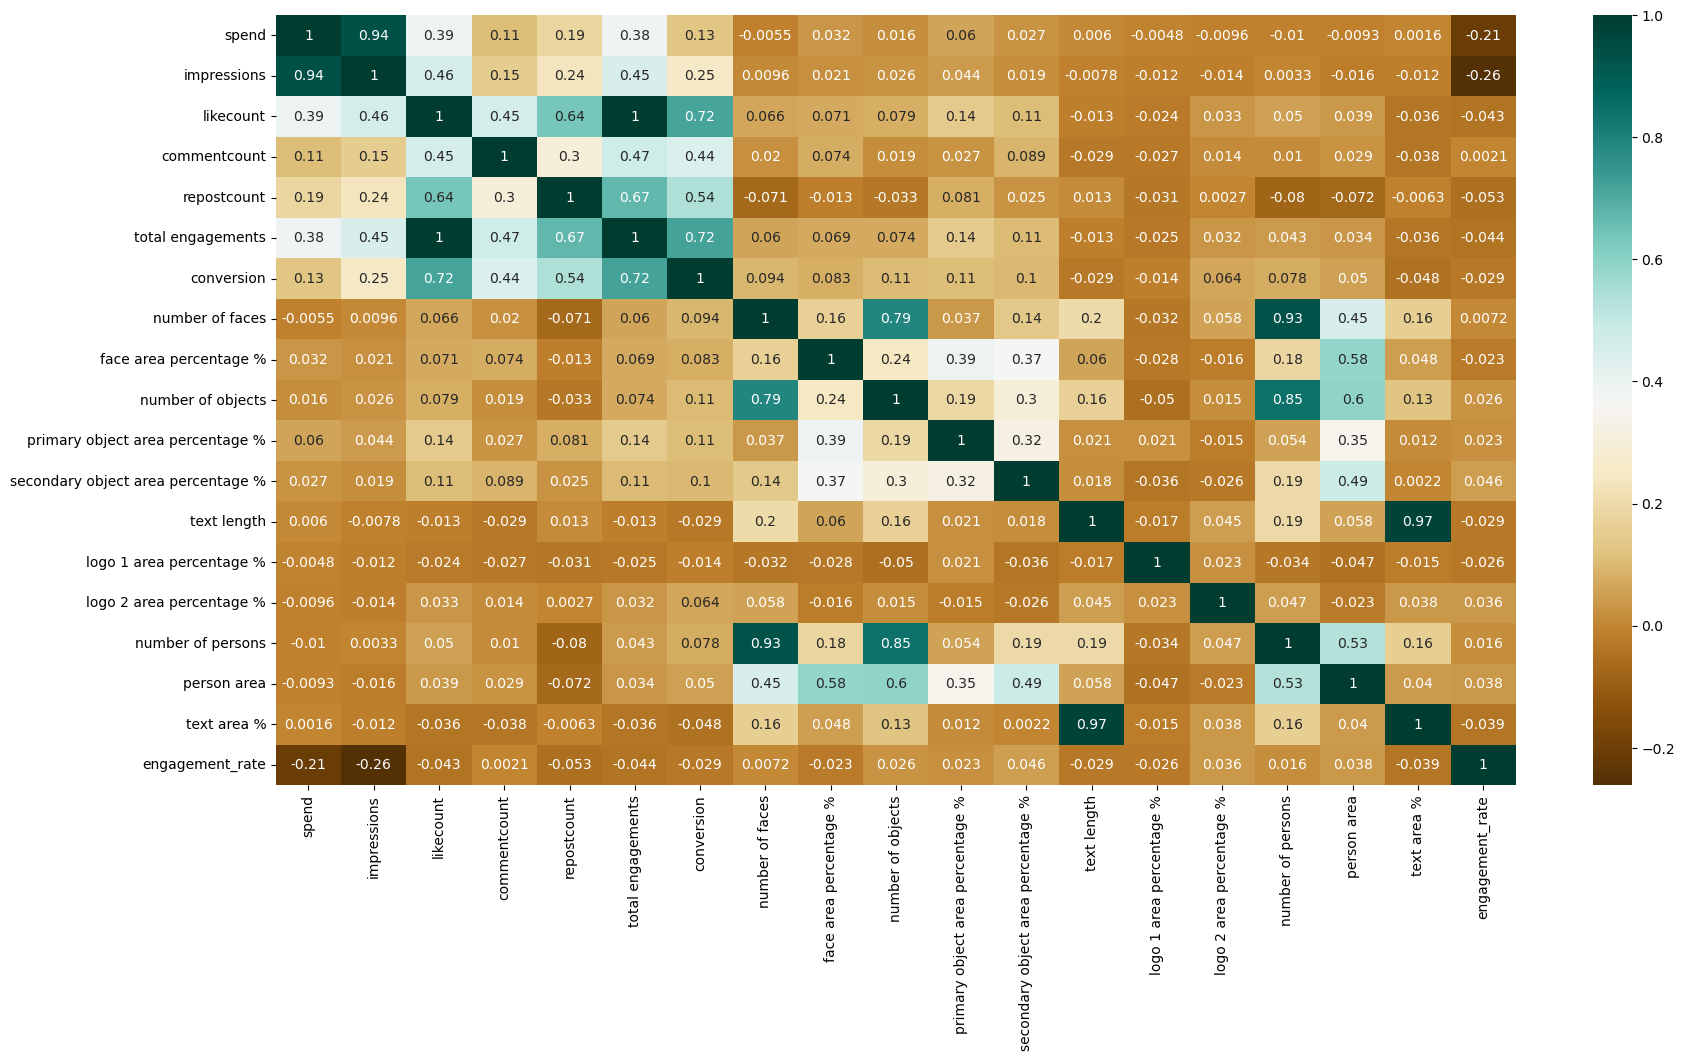

In [236]:
#finding the relationships between the variables(columns)
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
print(c)

In [237]:
# Define a function to create a headline
def create_headline(row):
    # Example: Combining the 'company name' and 'postcontent' columns
    return f"{row['company name']} - {row['postcontent']}"

# Apply the function to each row and create the 'headline' column
df['headline'] = df.apply(create_headline, axis=1)

In [238]:
#checking the dataset for changes after adding headline column
print(df.sample(10))

            date         company name   spend  impressions  likecount  \
312   2023-08-02               vertiv   10.02          510         17   
805   2023-08-24               vertiv   28.57         1222         33   
1033  2023-08-22  rockwell-automation    3.46          674         55   
607   2023-08-18  rockwell-automation   22.48         1144         61   
214   2023-09-06                   ge   10.88         1460         84   
35    2023-09-08   schneider-electric   35.26         5901        301   
939   2023-08-10     johnson-controls  336.96        16983        315   
777   2023-08-09  rockwell-automation   48.87         3044        216   
55    2023-09-07   schneider-electric  151.19        38886        473   
184   2023-09-12              siemens    3.86          172         11   

      commentcount  repostcount  total engagements  conversion action  ...  \
312              0            1                 18           5   Post  ...   
805              0            0         

C:\Users\aryan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


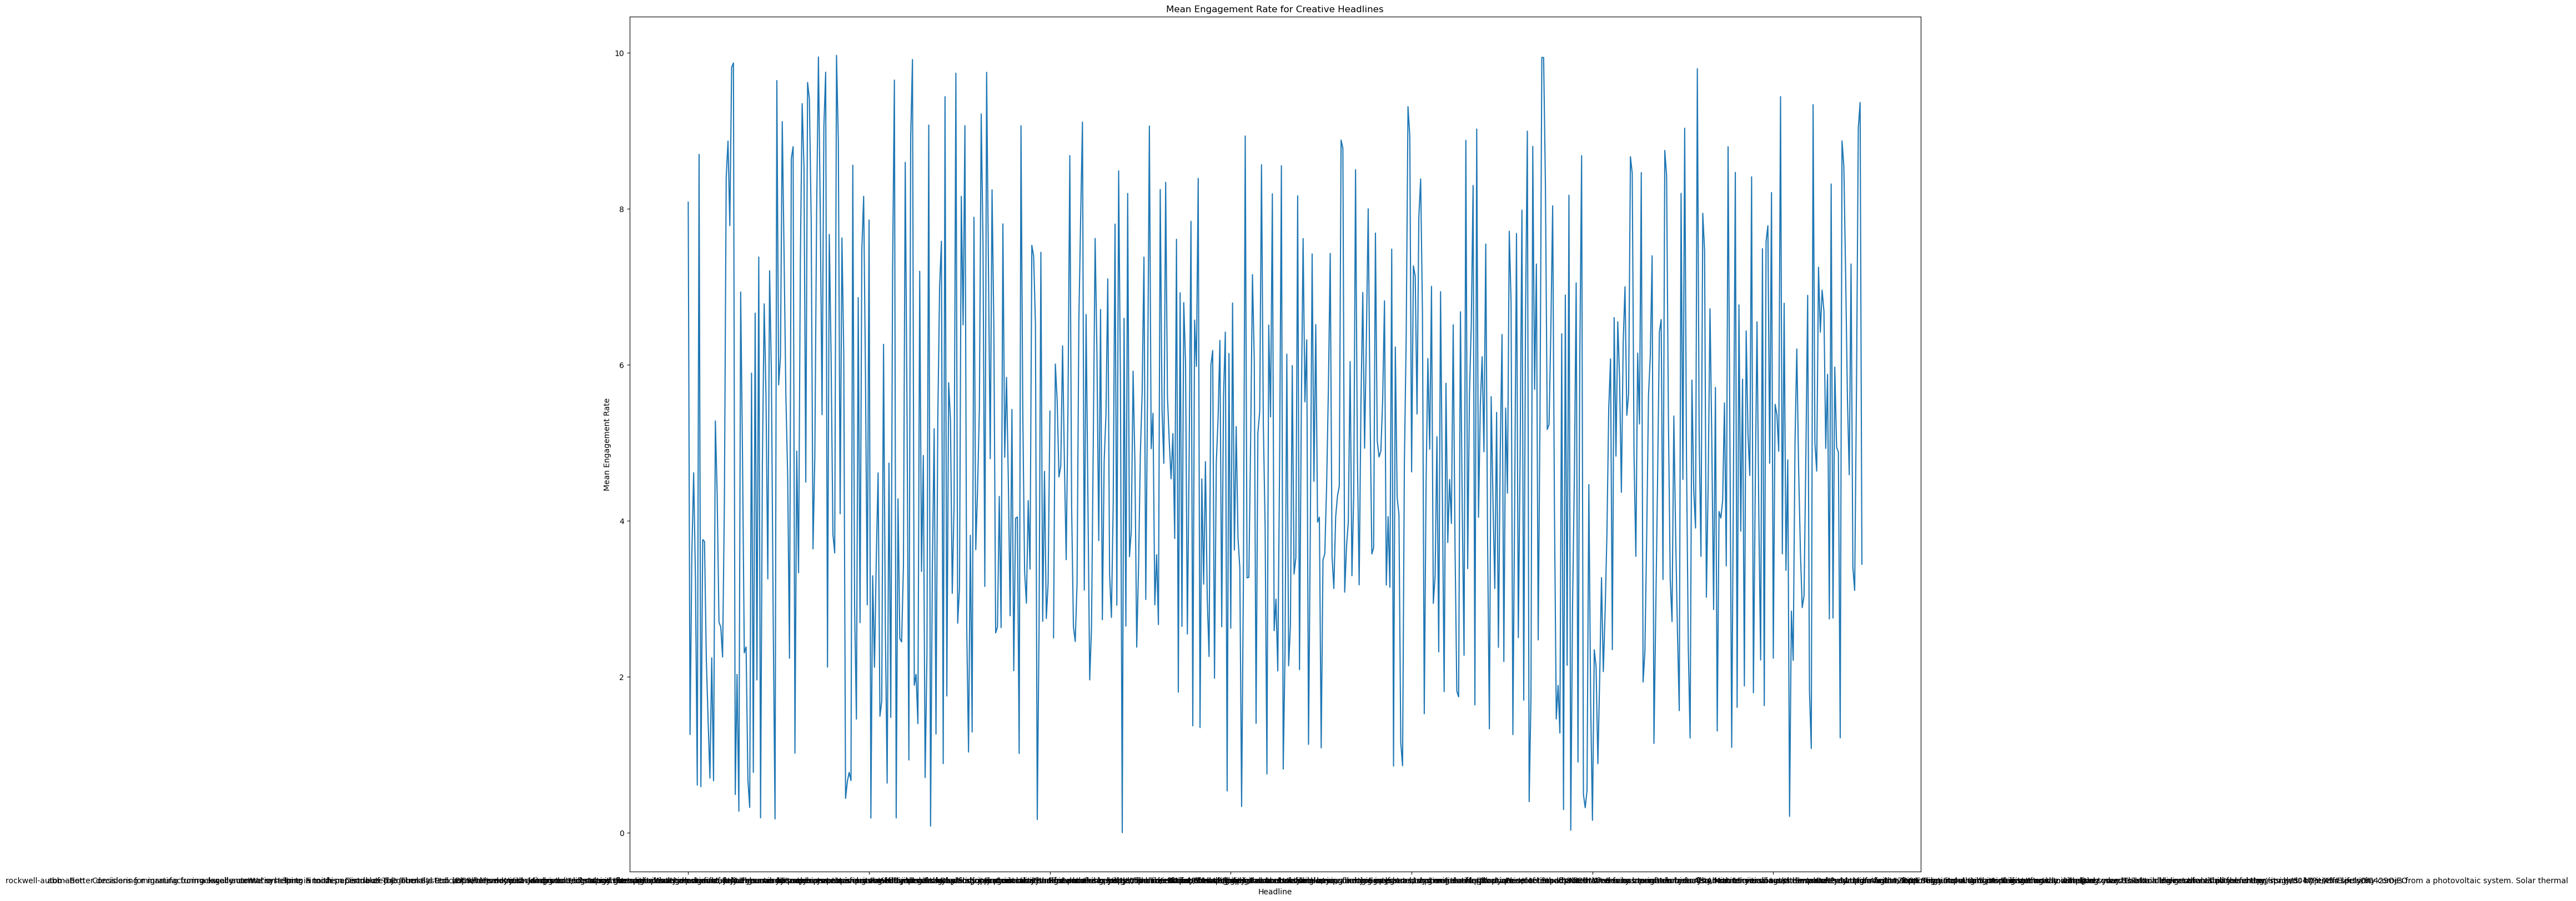

In [239]:
# Create a larger plot
plt.figure(figsize=(30,20))  # Adjust the width (10) and height (6) as needed

# Plot the mean engagement rate for creative headlines
df.groupby('headline')['engagement_rate'].mean().plot()

# Add labels and title as needed
plt.xlabel('Headline')
plt.ylabel('Mean Engagement Rate')
plt.title('Mean Engagement Rate for Creative Headlines')

# Show the plot
plt.show()

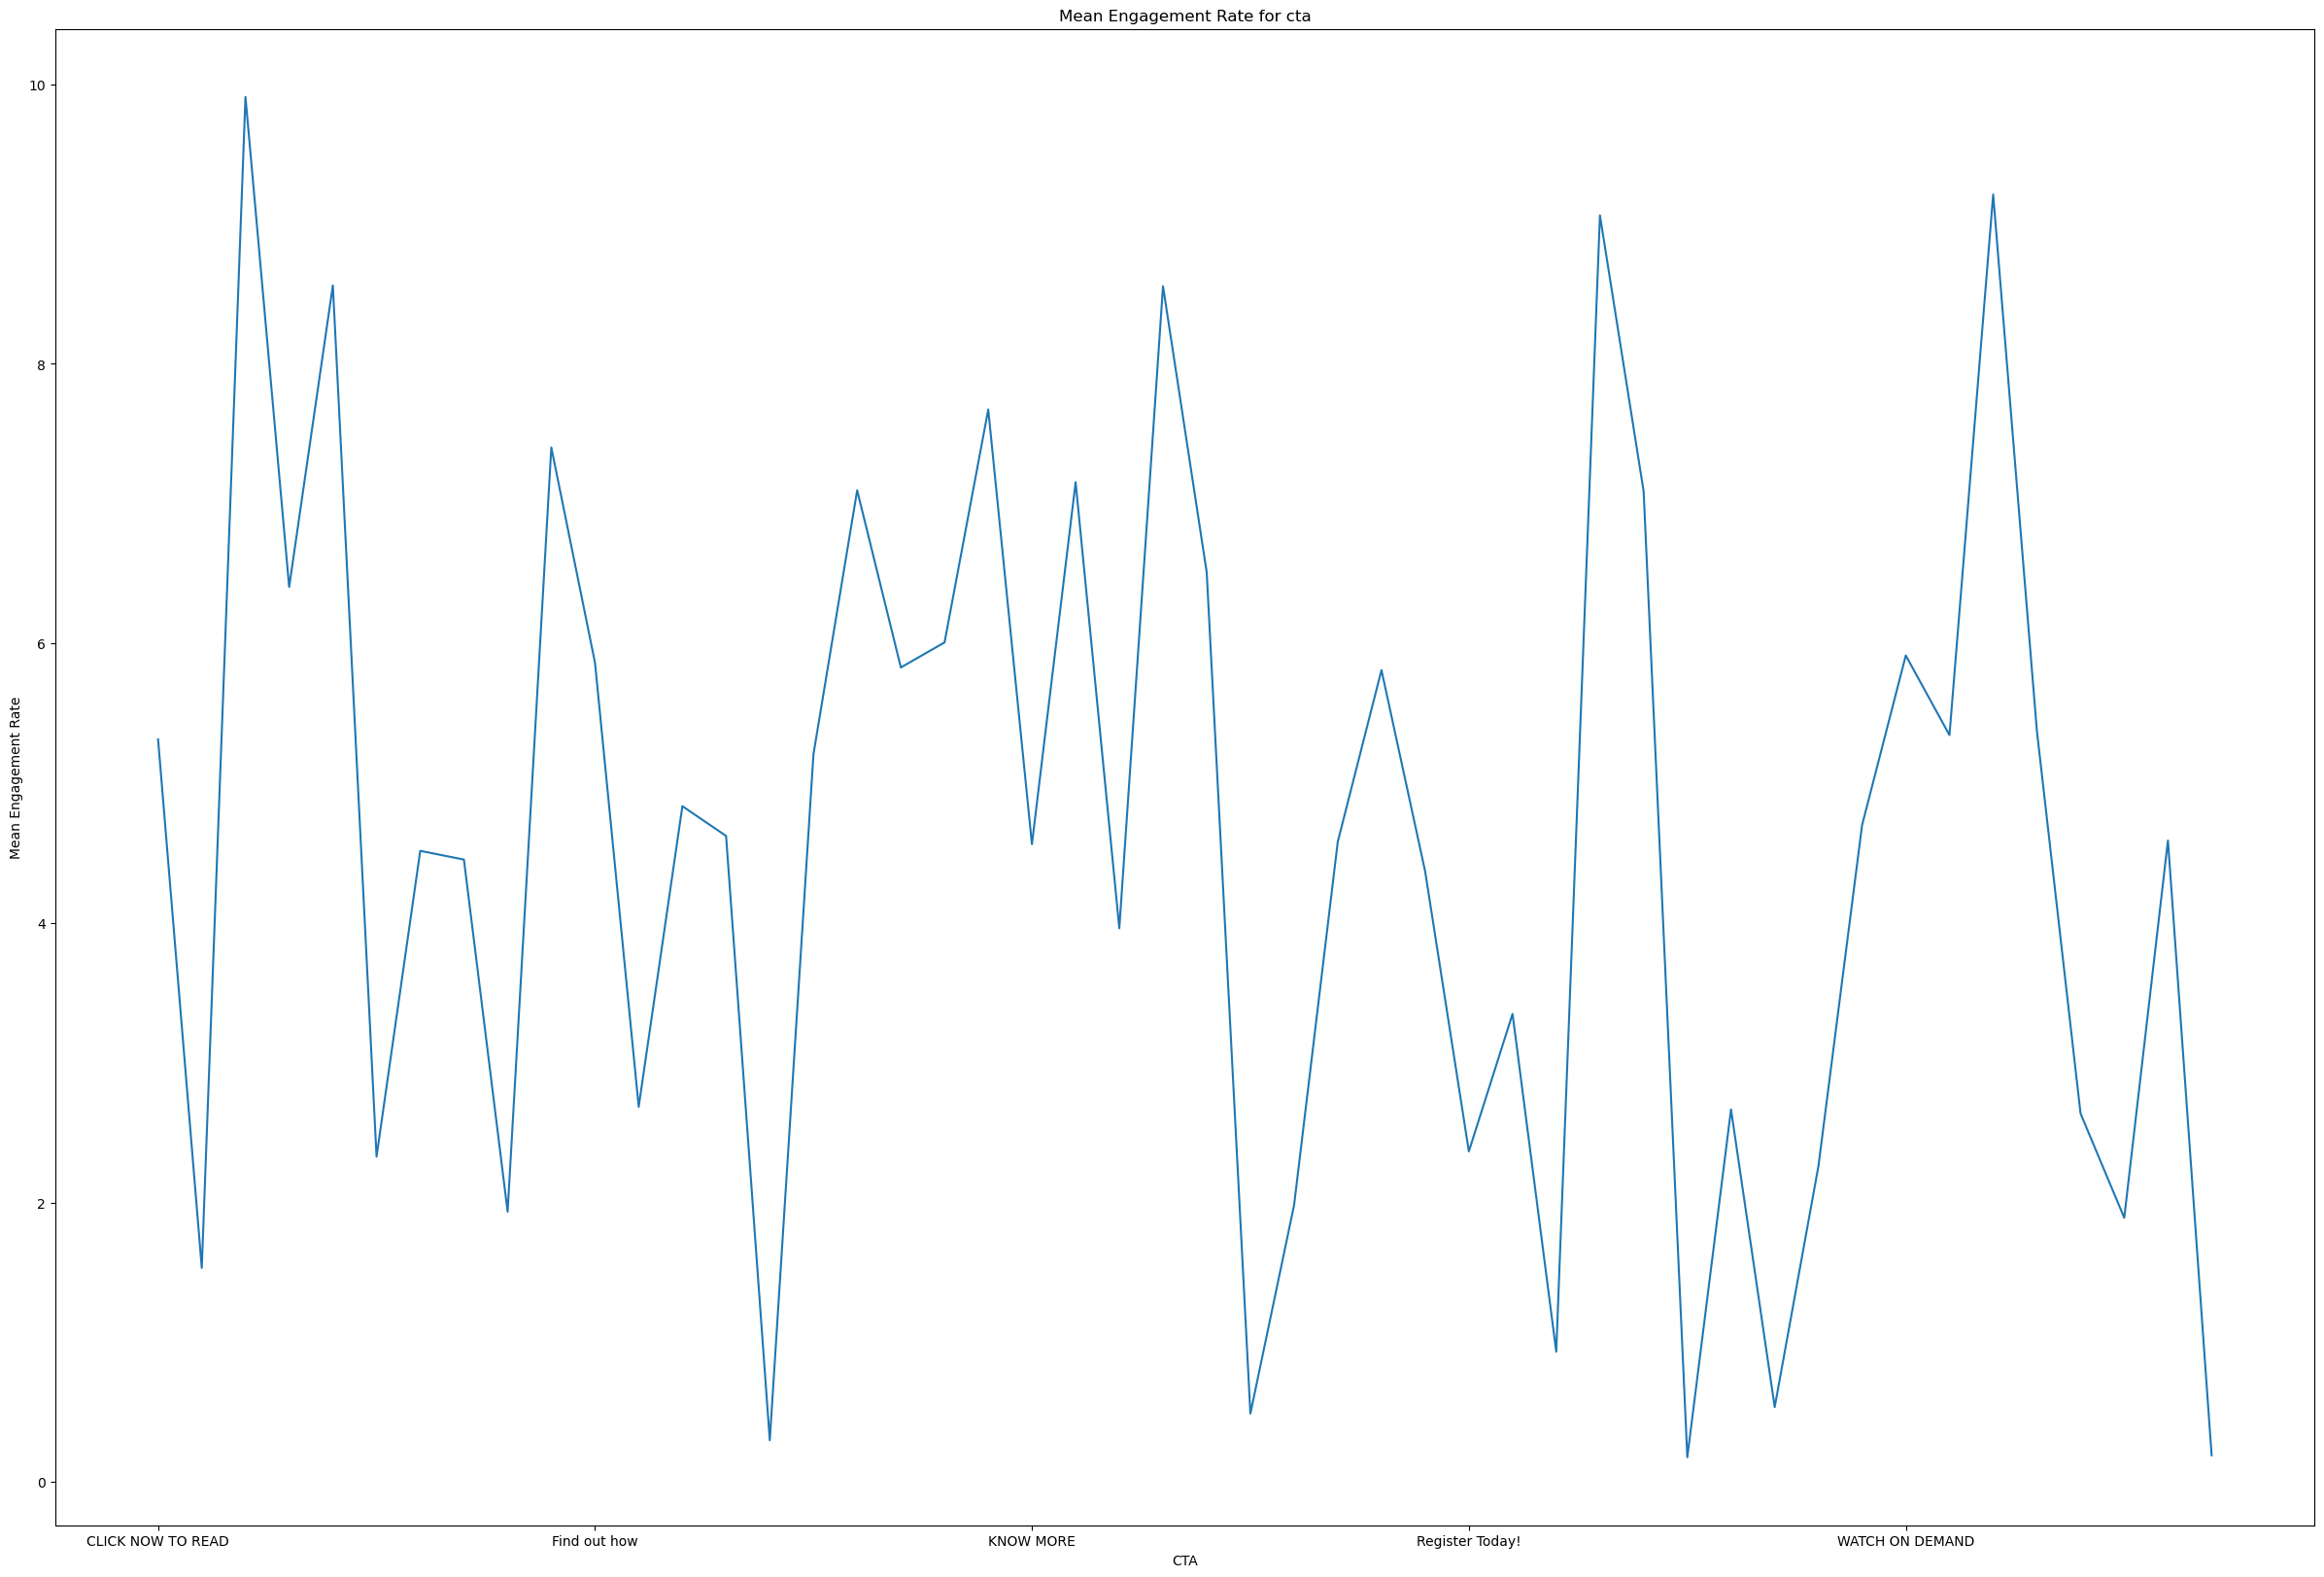

In [240]:
# Create a larger plot
plt.figure(figsize=(30,20))  # Adjust the width (10) and height (6) as needed

# Plot the mean engagement rate for cta
df.groupby('cta')['engagement_rate'].mean().plot()

# Add labels and title as needed
plt.xlabel('CTA')
plt.ylabel('Mean Engagement Rate')
plt.title('Mean Engagement Rate for cta')

# Show the plot
plt.show()

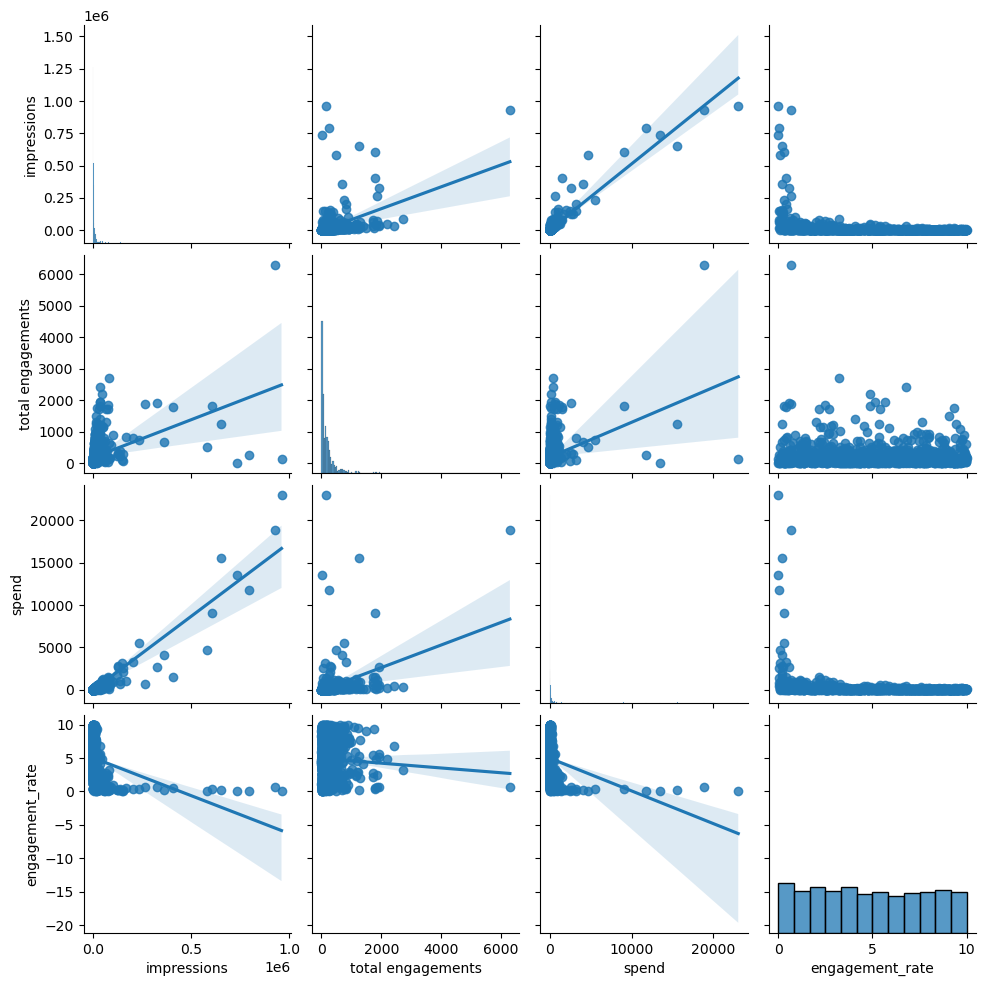

In [241]:
# Pairplot between quantitative cols
sns.pairplot(df[['impressions', 'total engagements', 'spend', 'engagement_rate']], kind='reg')

In [242]:
# Removing engagement rate outliers 
q1 = df['engagement_rate'].quantile(0.25)
q3 = df['engagement_rate'].quantile(0.75)
iqr = q3-q1
df = df[(df['engagement_rate'] > (q1 - 1.5*iqr)) & (df['engagement_rate'] < (q3 + 1.5*iqr))]

In [243]:
# Converting categorical columns into dummy variables
encoded_df = pd.get_dummies(df[['headline', 'cta']], drop_first=True)

In [244]:
# Standard scaling of quantitative features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['impressions', 'total engagements', 'spend']])

In [245]:
# Train test split
X = encoded_df
y = df['engagement_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Linear Regression RMSE: ', mean_squared_error(y_test, lr_pred))

Linear Regression RMSE:  7.00822561987341e+28


In [247]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('Lasso Regression RMSE: ', mean_squared_error(y_test, lasso_pred))

Lasso Regression RMSE:  7.906226030135557


In [248]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print('Ridge Regression RMSE: ', mean_squared_error(y_test, ridge_pred))

Ridge Regression RMSE:  8.857318542019712


In [249]:
# Random forest regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Random Forest RMSE: ', mean_squared_error(y_test, rf_pred))

Random Forest RMSE:  9.926219520195167


In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [251]:
linear_reg_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}

lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1],
}

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1],
}

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 15],
}

In [252]:
linear_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()

In [253]:
from sklearn.model_selection import train_test_split

# Split your data into X_train, y_train, X_test, and y_test

# GridSearchCV for Linear Regression
grid_search_linear = GridSearchCV(linear_reg, linear_reg_params, cv=5)
grid_search_linear.fit(X_train, y_train)

# GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(lasso, lasso_params, cv=5)
grid_search_lasso.fit(X_train, y_train)

# GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(ridge, ridge_params, cv=5)
grid_search_ridge.fit(X_train, y_train)

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf, rf_params, cv=5)
grid_search_rf.fit(X_train, y_train)

C:\Users\aryan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\aryan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\Users\aryan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 15],
                         'n_estimators': [100, 200, 500]})

In [254]:
# Evaluate models on the test set
linear_reg_best = grid_search_linear.best_estimator_
lasso_best = grid_search_lasso.best_estimator_
ridge_best = grid_search_ridge.best_estimator_
rf_best = grid_search_rf.best_estimator_

# Use the best models for prediction and evaluation
linear_reg_predictions = linear_reg_best.predict(X_test)
lasso_predictions = lasso_best.predict(X_test)
ridge_predictions = ridge_best.predict(X_test)
rf_predictions = rf_best.predict(X_test)

# Evaluate the models and compare their performance
# (e.g., calculate RMSE, R-squared, classification metrics, etc.)

In [255]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score

# Evaluate models and compare their performance
def evaluate_regression_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

def evaluate_classification_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    return accuracy, classification_rep

# Assuming you've already selected the best models based on grid search results
best_regression_model = grid_search_linear.best_estimator_  # Change this to your best model
best_classification_model = grid_search_rf.best_estimator_  # Change this to your best model
your_task_is_regression = True

# Step 6: Evaluate and compare models
if your_task_is_regression:
    mse, r2 = evaluate_regression_model(best_regression_model, X_test, y_test)
    print("Best Regression Model (Linear):")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
else:
    accuracy, classification_rep = evaluate_classification_model(best_classification_model, X_test, y_test)
    print("Best Classification Model (Random Forest):")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)

Best Regression Model (Linear):
Mean Squared Error: 1.778214868199707e+28
R-squared: -2.252026555943599e+27
